# CPSC 330 - Applied Machine Learning 

## Homework 6: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Wednesday, March 15, 2023 at 11:59pm**

## Table of contents

- [Submission instructions](#si)
- [Understanding the problem](#1)
- [Data splitting](#2)
- [EDA](#3)
- (Optional) [Feature engineering](#4)
- [Preprocessing and transformations](#5)
- [Baseline model](#6)
- [Linear models](#7)
- [Different classifiers](#8)
- (Optional) [Feature selection](#9)
- [Hyperparameter optimization](#10)
- [Interpretation and feature importances](#11)
- [Results on the test set](#12)
- (Optional) [Explaining predictions](#13)
- [Summary of the results](#14)

## Imports 

In [1]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    plot_confusion_matrix,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

<br><br>

## Instructions 
<hr>
rubric={points:2}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2022W2/blob/main/docs/homework_instructions.md). 

**You may work on this homework in a group and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 3. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Introduction <a name="in"></a>
<hr>

At this point we are at the end of supervised machine learning part of the course. So in this homework, you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips

1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 
4. If you are having trouble running models on your laptop because of the size of the dataset, you can create your train/test split in such a way that you have less data in the train split. If you end up doing this, please write a note to the grader in the submission explaining why you are doing it.  

#### Assessment

We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

#### A final note

Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (2-8 hours???) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Understanding the problem <a name="1"></a>
<hr>
rubric={points:4}

In this mini project, you will be working on a classification problem of predicting whether a customer will cancel the reservation they have made at a hotel. 
For this problem, you will use [Reservation Cancellation Prediction Dataset](https://www.kaggle.com/datasets/gauravduttakiit/reservation-cancellation-prediction?select=train__dataset.csv). In this data set, there are about 18.000 examples and 18 features (including the target), and the goal is to estimate whether a person will cancel their booking; this column is labeled "booking_status" in the data (1 = canceled). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/datasets/gauravduttakiit/reservation-cancellation-prediction?select=train__dataset.csv). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

Answer:  
1. From the description of each feature, my intuition is that the most useful predictors of whether a customer will cancel a reservation or not are:
- lead_time
- repeated_guest
- noofprevious_cancellations
- noofpreviousbookingsnot_canceled

In [2]:
res_df = pd.read_csv("train__dataset.csv")
res_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,4,0,0,0,118,2017,12,28,1,0,0,0,110.80,2,0
1,2,1,0,2,0,0,0,17,2018,4,14,1,0,0,0,145.00,0,1
2,1,0,1,5,0,0,0,349,2018,10,4,0,0,0,0,96.67,0,1
3,1,0,2,4,0,0,0,69,2018,6,12,0,0,0,0,120.00,0,1
4,2,0,0,4,1,0,0,11,2018,1,20,1,0,0,0,69.50,1,0


In [3]:
res_df.shape

(18137, 18)

<br><br>

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train and test portions. 

In [4]:
train_df, test_df = train_test_split(
    res_df, test_size=0.2, random_state=123
)  # 80%-20% train test split on df
X_train, y_train = train_df.drop(columns=["booking_status"]), train_df["booking_status"]
X_test, y_test = test_df.drop(columns=["booking_status"]), test_df["booking_status"]
train_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
800,2,0,1,3,0,0,0,23,2018,1,7,1,0,0,0,87.0,2,0
13544,1,0,0,1,0,0,0,15,2018,2,19,2,0,0,0,81.0,0,0
14555,1,0,1,1,0,0,0,3,2017,11,23,2,1,0,1,65.0,0,0
11224,2,0,0,2,0,0,1,148,2018,7,8,1,0,0,0,136.8,1,1
10890,2,1,2,4,0,0,0,61,2018,7,23,1,0,0,0,121.5,0,1


In [5]:
test_df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
9288,2,0,1,1,0,0,0,12,2017,12,5,0,0,0,0,55.00,0,0
8280,2,0,0,3,0,0,5,3,2018,9,22,1,0,0,0,218.72,1,0
9730,2,0,0,3,1,0,0,25,2018,10,20,1,0,0,0,119.00,1,0
5503,2,0,0,2,2,0,0,74,2017,9,18,0,0,0,0,101.50,0,0
16752,3,0,1,3,2,0,4,5,2018,8,4,1,0,0,0,228.80,0,1


In [7]:
shape_dict = {
    "Data portion": ["X_train", "y_train", "X_test", "y_test"],
    "Shape": [
        X_train.shape,
        y_train.shape,
        X_test.shape,
        y_test.shape,
    ],
}

shape_df = pd.DataFrame(shape_dict)
shape_df

,Data portion,Shape
0,X_train,"(14509, 17)"
1,y_train,"(14509,)"
2,X_test,"(3628, 17)"
3,y_test,"(3628,)"


In [8]:
y_test.head

<bound method NDFrame.head of 9288     0
8280     0
9730     0
5503     0
16752    1
        ..
17671    0
8786     1
8565     0
14369    1
10121    0
Name: booking_status, Length: 3628, dtype: int64>

<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14509 entries, 800 to 15725
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          14509 non-null  int64  
 1   no_of_children                        14509 non-null  int64  
 2   no_of_weekend_nights                  14509 non-null  int64  
 3   no_of_week_nights                     14509 non-null  int64  
 4   type_of_meal_plan                     14509 non-null  int64  
 5   required_car_parking_space            14509 non-null  int64  
 6   room_type_reserved                    14509 non-null  int64  
 7   lead_time                             14509 non-null  int64  
 8   arrival_year                          14509 non-null  int64  
 9   arrival_month                         14509 non-null  int64  
 10  arrival_date                          14509 non-null  int64  
 11  market_segmen

In [10]:
train_df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000,14509.000000
mean,1.849059,0.107106,0.809566,2.196223,0.319526,0.032532,0.337859,85.211524,2017.821628,7.422979,15.711765,0.803708,0.025364,0.022331,0.153629,103.558628,0.621476,0.325867
std,0.514970,0.398989,0.869672,1.414027,0.630462,0.177413,0.775620,86.901659,0.382839,3.079938,8.759235,0.644105,0.157232,0.359667,1.720322,35.546998,0.789420,0.468714
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,16.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,1.000000,0.000000,0.000000,0.000000,120.600000,1.000000,1.000000
max,4.000000,3.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


In [11]:
#Find the duplicates

num_duplicates = train_df.duplicated().sum()
print("There are ", num_duplicates, " duplicates in the training set.")

There are  3031  duplicates in the training set.


In [12]:
#Find null values

train_df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

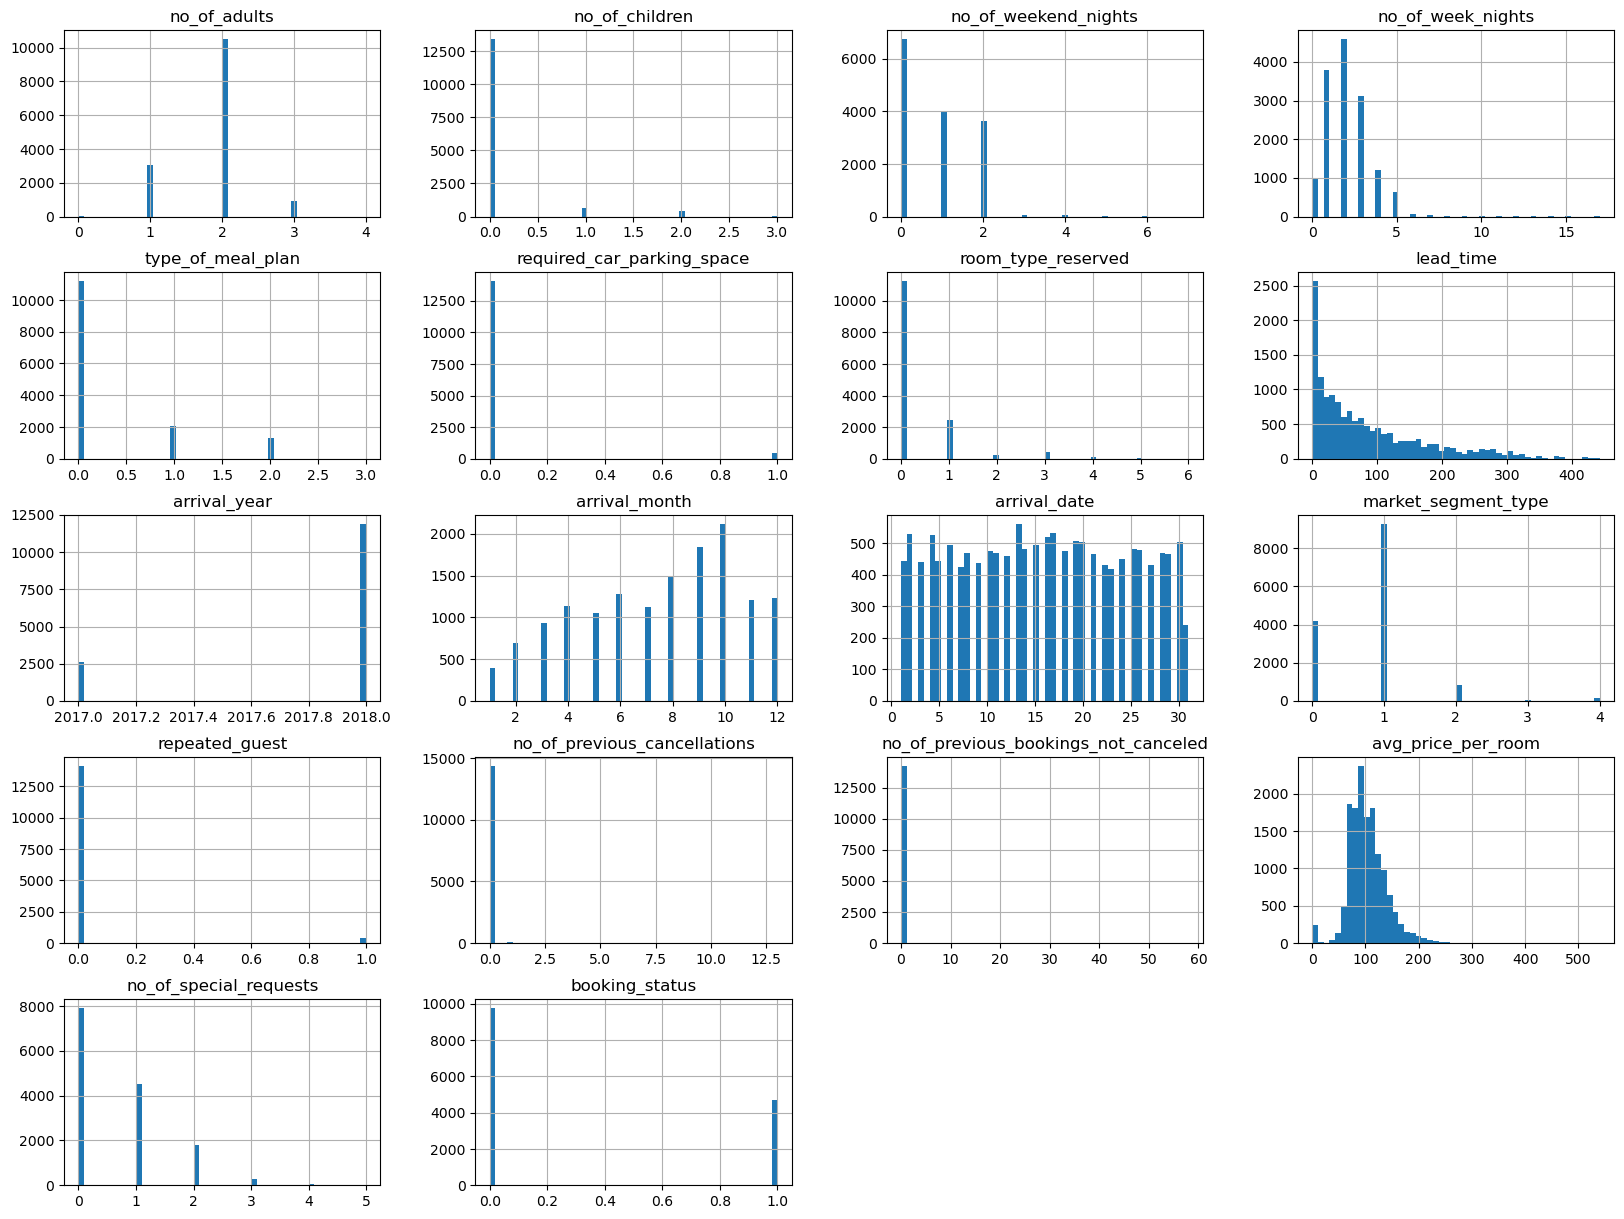

In [13]:
train_df.hist(bins=50, figsize=(20, 15));

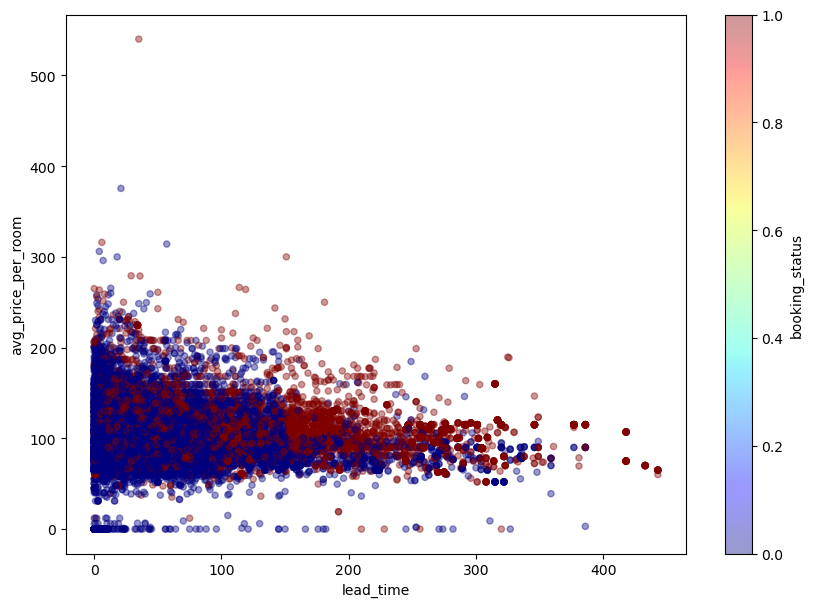

In [14]:
train_df.plot(
    kind="scatter",
    x="lead_time",
    y="avg_price_per_room",
    alpha=0.4,
    figsize=(10, 7),
    c="booking_status",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    sharex=False,
);

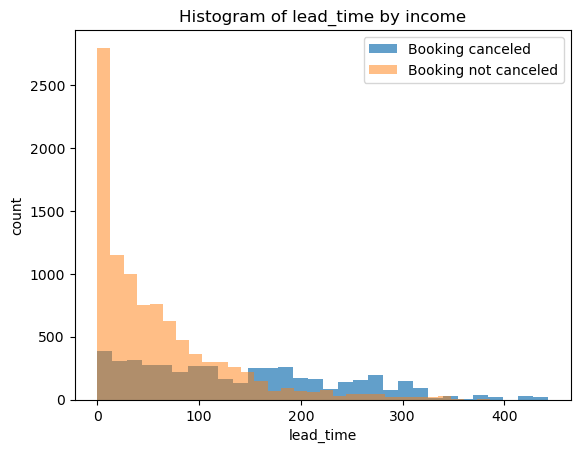

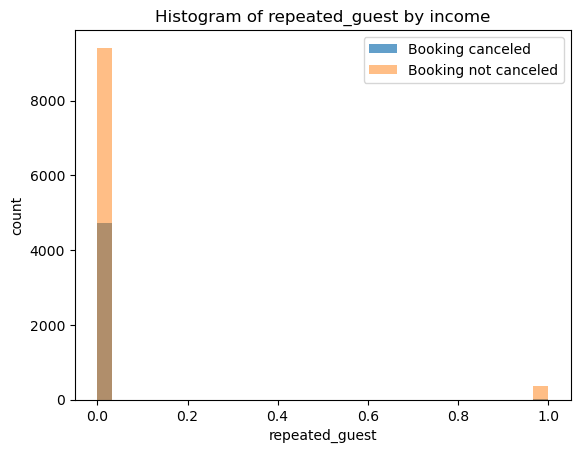

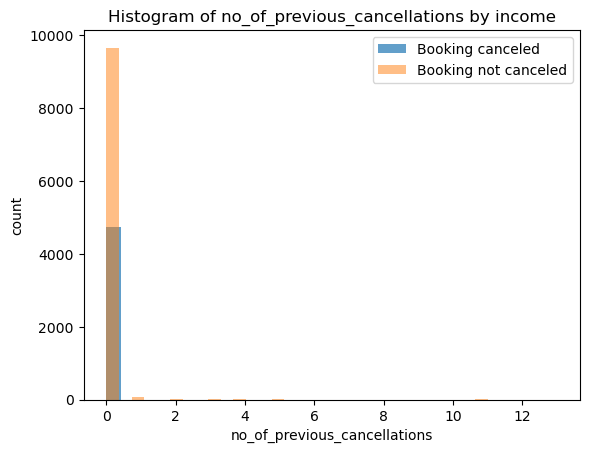

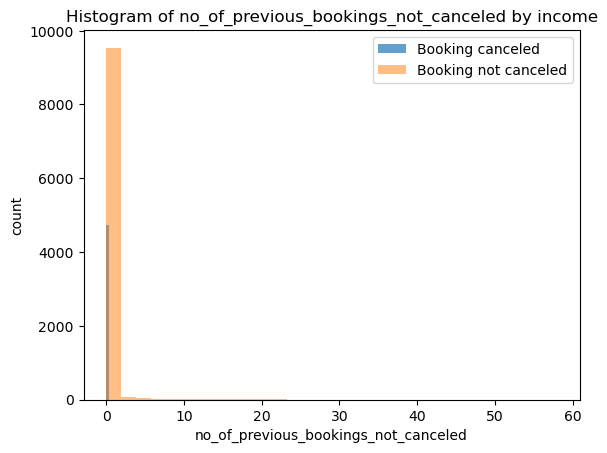

In [15]:
booking_canceled = train_df.query("booking_status == 1")
booking_not_canceled = train_df.query("booking_status == 0")
interesting_feats = ["lead_time", "repeated_guest", 
                     "no_of_previous_cancellations", 
                     "no_of_previous_bookings_not_canceled"]

for feature in interesting_feats:
    canceled = booking_canceled[feature]
    not_canceled = booking_not_canceled[feature]
    plt.hist(canceled, label='Booking canceled', alpha=0.7, bins=30)
    plt.hist(not_canceled, label='Booking not canceled', alpha=0.5, bins=30)
    plt.legend()
    plt.title('Histogram of ' + feature + ' by income')
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

<br><br>

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

In [16]:
# Changing 29 February in dataframe to 28 February in X_train
X_train.loc[(X_train['arrival_month'] == 2) & 
             (X_train['arrival_date'] == 29) & 
             (X_train['arrival_year'] == 2018), 'arrival_date'] = 28

In [17]:
# check if there are any more rows with '29 February'
X_train.loc[(X_train['arrival_month'] == 2) & (X_train['arrival_date'] == 29)]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests


In [18]:
# Changing 29 February in dataframe to 28 February in X_test
X_test.loc[(X_test['arrival_month'] == 2) & 
             (X_test['arrival_date'] == 29) & 
             (X_test['arrival_year'] == 2018), 'arrival_date'] = 28

In [19]:
# check if there are any more rows with '29 February'
X_test.loc[(X_test['arrival_month'] == 2) & (X_test['arrival_date'] == 29)]

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests


In [20]:
# Creating a new feature called 'date' which combines
# arrival_year, arrival_month and arrival_date into one feature

import datetime

X_train['date'] = X_train.apply(lambda x: datetime.date(x['arrival_year'].astype(int), x['arrival_month'].astype(int), x['arrival_date'].astype(int)), axis=1)
X_test['date'] = X_test.apply(lambda x: datetime.date(x['arrival_year'].astype(int), x['arrival_month'].astype(int), x['arrival_date'].astype(int)), axis=1)

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14509 entries, 800 to 15725
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          14509 non-null  int64  
 1   no_of_children                        14509 non-null  int64  
 2   no_of_weekend_nights                  14509 non-null  int64  
 3   no_of_week_nights                     14509 non-null  int64  
 4   type_of_meal_plan                     14509 non-null  int64  
 5   required_car_parking_space            14509 non-null  int64  
 6   room_type_reserved                    14509 non-null  int64  
 7   lead_time                             14509 non-null  int64  
 8   arrival_year                          14509 non-null  int64  
 9   arrival_month                         14509 non-null  int64  
 10  arrival_date                          14509 non-null  int64  
 11  market_segmen

In [21]:
X_train.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,date
800,2,0,1,3,0,0,0,23,2018,1,7,1,0,0,0,87.0,2,2018-01-07
13544,1,0,0,1,0,0,0,15,2018,2,19,2,0,0,0,81.0,0,2018-02-19
14555,1,0,1,1,0,0,0,3,2017,11,23,2,1,0,1,65.0,0,2017-11-23
11224,2,0,0,2,0,0,1,148,2018,7,8,1,0,0,0,136.8,1,2018-07-08
10890,2,1,2,4,0,0,0,61,2018,7,23,1,0,0,0,121.5,0,2018-07-23


In [22]:
X_test.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,date
9288,2,0,1,1,0,0,0,12,2017,12,5,0,0,0,0,55.00,0,2017-12-05
8280,2,0,0,3,0,0,5,3,2018,9,22,1,0,0,0,218.72,1,2018-09-22
9730,2,0,0,3,1,0,0,25,2018,10,20,1,0,0,0,119.00,1,2018-10-20
5503,2,0,0,2,2,0,0,74,2017,9,18,0,0,0,0,101.50,0,2017-09-18
16752,3,0,1,3,2,0,4,5,2018,8,4,1,0,0,0,228.80,0,2018-08-04


<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [26]:
count_adults = train_df["no_of_adults"].unique().size
print("Unique values count for no_of_adults : ", count_adults)

count_children = train_df["no_of_children"].unique().size
print("Unique values count for no_of_children : ", count_children)

count_wkend_nights = train_df["no_of_weekend_nights"].unique().size
print("Unique values count for no_of_weekend_nights : ", count_wkend_nights)

count_weeknights = train_df["no_of_week_nights"].unique().size
print("Unique values count for no_of_week_nights : ", count_weeknights)

count_mealplan = train_df["type_of_meal_plan"].unique().size
print("Unique values count for type_of_meal_plan : ", count_mealplan)

count_parking = train_df["required_car_parking_space"].unique().size
print("Unique values count for required_car_parking_space : ", count_parking)

count_room_type = train_df["room_type_reserved"].unique().size
print("Unique values count for room_type_reserved : ", count_room_type)

count_mkt_segment = train_df["market_segment_type"].unique().size
print("Unique values count for market_segment_type : ", count_mkt_segment)

count_repeated_guest = train_df["repeated_guest"].unique().size
print("Unique values count for repeated_guest : ", count_repeated_guest)

count_prev_cancellations = train_df["no_of_previous_cancellations"].unique().size
print("Unique values count for no_of_previous_cancellations : ", count_prev_cancellations)

count_prev_non_cancellations = train_df["no_of_previous_bookings_not_canceled"].unique().size
print("Unique values count for no_of_previous_bookings_not_canceled : ", count_prev_non_cancellations)

count_spec_requests = train_df["no_of_special_requests"].unique().size
print("Unique values count for no_of_special_requests : ", count_spec_requests)

Unique values count for no_of_adults :  5
Unique values count for no_of_children :  4
Unique values count for no_of_weekend_nights :  8
Unique values count for no_of_week_nights :  18
Unique values count for type_of_meal_plan :  4
Unique values count for required_car_parking_space :  2
Unique values count for room_type_reserved :  7
Unique values count for market_segment_type :  5
Unique values count for repeated_guest :  2
Unique values count for no_of_previous_cancellations :  9
Unique values count for no_of_previous_bookings_not_canceled :  40
Unique values count for no_of_special_requests :  6


In [27]:
numeric_features = ["no_of_week_nights", "no_of_previous_bookings_not_canceled", 
                    "lead_time", "avg_price_per_room"]
categorical_features = ["no_of_adults", "no_of_children", "no_of_weekend_nights",
                       "type_of_meal_plan", "room_type_reserved", "market_segment_type", 
                       "no_of_previous_cancellations", "no_of_special_requests"]
binary_features = ["required_car_parking_space", "repeated_guest"]
drop_features = ["arrival_year", "arrival_month", "arrival_date", "date"]
passthrough_features = []
target = "booking_status"

In [28]:
ct = make_column_transformer(
    (
        StandardScaler(),
        numeric_features,
    ),  # scaling on numeric features
    (
        OneHotEncoder(handle_unknown="ignore", sparse=False),
        categorical_features,
    ),  # OHE on categorical features
    (
        OneHotEncoder(drop="if_binary", dtype=int, sparse=False),
        binary_features,
    ),  # OHE on categorical features
    ("passthrough", passthrough_features),  
    ("drop", drop_features)
)

<br><br>

## 6. Baseline model <a name="6"></a>
<hr>

rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [37]:
pipe = make_pipeline(
    ct, DummyClassifier(strategy="most_frequent")
)

pipe.fit(X_train, y_train)

print("Accuracy for dummy classifier: ", pipe.score(X_test, y_test))

from sklearn.metrics import classification_report

print(
    classification_report(
        y_test, pipe.predict(X_test), target_names=["not canceled", "canceled"]
    )
)

Accuracy for dummy classifier:  0.665380374862183
              precision    recall  f1-score   support

not canceled       0.67      1.00      0.80      2414
    canceled       0.00      0.00      0.00      1214

    accuracy                           0.67      3628
   macro avg       0.33      0.50      0.40      3628
weighted avg       0.44      0.67      0.53      3628



/Users/timothyteh/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/timothyteh/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/timothyteh/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

<br><br>

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:12}

**Your tasks:**

1. Try logistic regression as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter `C`. 
3. Report validation scores along with standard deviation. 
4. Summarize your results.

In [38]:
pipe_lr = make_pipeline(ct, LogisticRegression(max_iter=1000))

param_grid = {
    "logisticregression__C": 10.0 ** np.arange(-2, 2, 0.5), 
}

grid_search = GridSearchCV(
    pipe_lr, param_grid, cv=5, n_jobs=-1, return_train_score=True, scoring="f1"
)

grid_search.fit(X_train, y_train)

results = (
    pd.DataFrame(grid_search.cv_results_).set_index("rank_test_score").sort_index()
)
display(results.T)

rank_test_score,1,2,3,4,5,6,7,8
mean_fit_time,1.163343,1.028614,0.993924,0.644643,0.397321,0.252749,0.192619,0.171888
std_fit_time,0.186184,0.163889,0.076608,0.040566,0.032256,0.00774,0.04204,0.009392
mean_score_time,0.022903,0.012336,0.023371,0.022171,0.022882,0.022495,0.018223,0.023212
std_score_time,0.00137,0.002085,0.000565,0.001935,0.002128,0.003316,0.001411,0.002103
param_logisticregression__C,10.0,31.622777,3.162278,1.0,0.316228,0.1,0.031623,0.01
params,{'logisticregression__C': 10.0},{'logisticregression__C': 31.622776601683793},{'logisticregression__C': 3.1622776601683795},{'logisticregression__C': 1.0},{'logisticregression__C': 0.31622776601683794},{'logisticregression__C': 0.1},{'logisticregression__C': 0.03162277660168379},{'logisticregression__C': 0.01}
split0_test_score,0.674325,0.673563,0.675101,0.673951,0.670133,0.671304,0.666274,0.639805
split1_test_score,0.68674,0.6875,0.685582,0.685582,0.684884,0.679487,0.671792,0.649112
split2_test_score,0.673458,0.673827,0.671202,0.670455,0.669332,0.663212,0.660035,0.642424
split3_test_score,0.667447,0.666667,0.667838,0.667836,0.664319,0.661196,0.656361,0.628221


In [39]:
grid_search.best_score_

0.6747995654789793

In [40]:
grid_search.best_params_

{'logisticregression__C': 10.0}

<br><br>

## 8. Different classifiers <a name="8"></a>
<hr>
rubric={points:15}

**Your tasks:**
1. Try at least 3 other models aside from logistic regression. At least one of these models should be a tree-based ensemble model (e.g., lgbm, random forest, xgboost). 
2. Summarize your results. Can you beat logistic regression? 

In [41]:
# from lecture 3: ml fundamentals
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation
    """
    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [42]:
# SVC

scoring_metric = "accuracy"

pipe_svm = make_pipeline(ct, SVC(max_iter=1000))

mean_std_cross_val_scores(pipe_svm, X_train, y_train, return_train_score=True, scoring=scoring_metric)

/Users/timothyteh/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/timothyteh/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/timothyteh/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/timothyteh/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/timot

fit_time       1.672 (+/- 0.072)
score_time     0.910 (+/- 0.031)
test_score     0.548 (+/- 0.072)
train_score    0.554 (+/- 0.079)
dtype: object

In [43]:
# LightGBM

from lightgbm.sklearn import LGBMClassifier

pipe_lgbm = make_pipeline(ct, LGBMClassifier(random_state=123))

mean_std_cross_val_scores(
    pipe_lgbm, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

fit_time       0.116 (+/- 0.011)
score_time     0.016 (+/- 0.001)
test_score     0.872 (+/- 0.008)
train_score    0.893 (+/- 0.002)
dtype: object

In [44]:
# Random Forest Classifier
pipe_rfc = make_pipeline(ct, RandomForestClassifier())
mean_std_cross_val_scores(
    pipe_rfc, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

fit_time       0.856 (+/- 0.026)
score_time     0.064 (+/- 0.007)
test_score     0.866 (+/- 0.005)
train_score    0.996 (+/- 0.000)
dtype: object

<br><br>

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

In [48]:
from sklearn.feature_selection import RFECV

X_train_scaled = ct.fit_transform(X_train)

rfe_cv = RFECV(LogisticRegression(max_iter=2000), cv=10)
rfe_cv.fit(X_train_scaled, y_train)
print(rfe_cv.support_)

[False  True  True  True  True  True False  True  True False  True False
  True  True  True  True  True  True  True  True  True False  True False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False False  True  True  True  True
  True  True  True False  True  True]


In [52]:
rfe_lgbm_pipe = make_pipeline(
    ct,
    RFECV(LogisticRegression(max_iter=2000), cv=10),
    LGBMClassifier(random_state=123),
)

pd.DataFrame(cross_validate(rfe_lgbm_pipe, X_train, y_train, return_train_score=True)).mean()

fit_time       61.801057
score_time      0.020708
test_score      0.868564
train_score     0.889172
dtype: float64

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:15}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. You may pick one of the best performing models from the previous exercise and tune hyperparameters only for that model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

In [53]:
# Random Forest

pipe_rfc = make_pipeline(ct, RandomForestClassifier())

param_grid = {
    'randomforestclassifier__n_estimators': [100, 300, 500, 800, 1200],
    'randomforestclassifier__max_depth' : [5, 8, 15, 25, 30],
    
}

grid_search = GridSearchCV(
    pipe_rfc, param_grid, cv=5, n_jobs=-1, return_train_score=True
)

grid_search.fit(X_train, y_train)

results = (
    pd.DataFrame(grid_search.cv_results_).set_index("rank_test_score").sort_index()
)
display(results.T)

print("Best score for Random Forest Classifier: ", grid_search.best_score_)
print("Best params for Random Forest Classifier: ", grid_search.best_params_)

rank_test_score,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
mean_fit_time,7.35919,1.468049,4.265039,11.475455,16.933649,8.661596,14.310628,5.163679,21.920418,18.477464,...,12.131625,3.12785,8.151887,5.212489,1.081342,3.953605,0.940114,10.330743,2.307367,6.988416
std_fit_time,0.02047,0.013474,0.02562,0.148498,0.119907,0.03036,0.073413,0.035049,0.206081,2.475205,...,0.067197,0.020291,0.043978,0.102502,0.025896,0.108572,0.02056,0.303205,0.074852,0.244635
mean_score_time,0.414512,0.098869,0.257066,0.721738,0.982549,0.516964,1.086794,0.294674,1.489741,0.895831,...,0.701034,0.190743,0.484704,0.308764,0.080137,0.29851,0.066232,0.650865,0.159749,0.56793
std_score_time,0.006742,0.00209,0.010045,0.054782,0.038642,0.015542,0.098644,0.003411,0.197759,0.12058,...,0.010037,0.005489,0.008482,0.006646,0.004414,0.017954,0.006028,0.010944,0.005236,0.169714
param_randomforestclassifier__max_depth,15,15,15,15,15,25,25,25,25,30,...,8,8,8,8,8,5,5,5,5,5
param_randomforestclassifier__n_estimators,500,100,300,800,1200,500,800,300,1200,1200,...,1200,300,800,500,100,500,100,1200,300,800
params,"{'randomforestclassifier__max_depth': 15, 'ran...","{'randomforestclassifier__max_depth': 15, 'ran...","{'randomforestclassifier__max_depth': 15, 'ran...","{'randomforestclassifier__max_depth': 15, 'ran...","{'randomforestclassifier__max_depth': 15, 'ran...","{'randomforestclassifier__max_depth': 25, 'ran...","{'randomforestclassifier__max_depth': 25, 'ran...","{'randomforestclassifier__max_depth': 25, 'ran...","{'randomforestclassifier__max_depth': 25, 'ran...","{'randomforestclassifier__max_depth': 30, 'ran...",...,"{'randomforestclassifier__max_depth': 8, 'rand...","{'randomforestclassifier__max_depth': 8, 'rand...","{'randomforestclassifier__max_depth': 8, 'rand...","{'randomforestclassifier__max_depth': 8, 'rand...","{'randomforestclassifier__max_depth': 8, 'rand...","{'randomforestclassifier__max_depth': 5, 'rand...","{'randomforestclassifier__max_depth': 5, 'rand...","{'randomforestclassifier__max_depth': 5, 'rand...","{'randomforestclassifier__max_depth': 5, 'rand...","{'randomforestclassifier__max_depth': 5, 'rand..."
split0_test_score,0.8694,0.869056,0.869745,0.868022,0.868367,0.877671,0.874914,0.873535,0.87388,0.873191,...,0.840455,0.842178,0.839421,0.838732,0.838732,0.777739,0.778084,0.779807,0.782908,0.776706
split1_test_score,0.88215,0.880772,0.880083,0.88215,0.88215,0.87388,0.877671,0.876637,0.873191,0.874569,...,0.845968,0.845624,0.841833,0.839421,0.841489,0.79428,0.794624,0.787733,0.78532,0.788422
split2_test_score,0.866299,0.869056,0.866644,0.866644,0.864921,0.869056,0.867333,0.866988,0.8694,0.866988,...,0.843556,0.842522,0.842867,0.843901,0.844245,0.791868,0.789456,0.796347,0.795314,0.796347


Best score for Random Forest Classifier:  0.8714591394255315
Best params for Random Forest Classifier:  {'randomforestclassifier__max_depth': 15, 'randomforestclassifier__n_estimators': 500}


In [54]:
pipe_lgbm.named_steps

{'columntransformer': ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                  ['no_of_week_nights',
                                   'no_of_previous_bookings_not_canceled',
                                   'lead_time', 'avg_price_per_room']),
                                 ('onehotencoder-1',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  ['no_of_adults', 'no_of_children',
                                   'no_of_weekend_nights', 'type_of_meal_plan',
                                   'room_type_reserved', 'market_segment_type',
                                   'no_of_previous_cancellations',
                                   'no_of_special_requests']),
                                 ('onehotencoder-2',
                                  OneHotEncoder(drop='if_binary',
                                       

In [55]:
pipe_lgbm = make_pipeline(ct, LGBMClassifier(random_state=123))

param_grid = {
    'lgbmclassifier__learning_rate': [0.05],
    'lgbmclassifier__num_leaves': [90,200],
    'lgbmclassifier__boosting_type' : ['gbdt'],
    'lgbmclassifier__objective' : ['binary'],
    'lgbmclassifier__max_depth' : [5,6,7,8],
    'lgbmclassifier__random_state' : [501], 
    'lgbmclassifier__colsample_bytree' : [0.5,0.7],
    'lgbmclassifier__subsample' : [0.5,0.7],
    'lgbmclassifier__min_split_gain' : [0.01],
    'lgbmclassifier__min_data_in_leaf':[10],
    'lgbmclassifier__metric':['auc']
    }

grid = RandomizedSearchCV(pipe_lgbm,param_grid,verbose=1,cv=10,n_jobs = -1,n_iter=10)

grid.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['no_of_week_nights',
                                                                                'no_of_previous_bookings_not_canceled',
                                                                                'lead_time',
                                                                                'avg_price_per_room']),
                                                                              ('onehotencoder-1',
                                                                               OneHotEncoder(handle_unknown='ignore',
                                                                                             sparse=False),
                                                                               ['no_of_adults',
                                                                                'no_of_children',
                                                                                'no_of_weeke...
                                        'lgbmclassifier__learning_rate': [0.05],
                                        'lgbmclassifier__max_depth': [5, 6, 7,
                                                                      8],
                                        'lgbmclassifier__metric': ['auc'],
                                        'lgbmclassifier__min_data_in_leaf': [10],
                                        'lgbmclassifier__min_split_gain': [0.01],
                                        'lgbmclassifier__num_leaves': [90, 200],
                                        'lgbmclassifier__objective': ['binary'],
                                        'lgbmclassifier__random_state': [501],
                                        'lgbmclassifier__subsample': [0.5,
                                                                      0.7]},
                   verbose=1)

In [56]:
grid.best_params_

{'lgbmclassifier__subsample': 0.5,
 'lgbmclassifier__random_state': 501,
 'lgbmclassifier__objective': 'binary',
 'lgbmclassifier__num_leaves': 200,
 'lgbmclassifier__min_split_gain': 0.01,
 'lgbmclassifier__min_data_in_leaf': 10,
 'lgbmclassifier__metric': 'auc',
 'lgbmclassifier__max_depth': 8,
 'lgbmclassifier__learning_rate': 0.05,
 'lgbmclassifier__colsample_bytree': 0.7,
 'lgbmclassifier__boosting_type': 'gbdt'}

In [57]:
grid.best_score_

0.8720098861664963

<br><br>

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:15}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to explain feature importances of one of the best performing models. Summarize your observations. 

In [58]:
pipe_lgbm.fit(X_train, y_train)

ohe_feature_names = (
    pipe_rfc.named_steps["columntransformer"]
    .named_transformers_["onehotencoder-1"]
    .get_feature_names_out()
    .tolist()
)

feature_names = numeric_features + binary_features + ohe_feature_names

eli5.explain_weights(
    pipe_lgbm.named_steps["lgbmclassifier"], feature_names=feature_names
)

NameError: name 'eli5' is not defined

In [59]:
X_train_enc = pd.DataFrame(
    data=ct.transform(X_train),
    columns=feature_names,
    index=X_train.index,
)
X_train_enc.head()
X_train_enc.shape

(14509, 54)

In [ ]:
X_test_enc = pd.DataFrame(
    data=ct.transform(X_test),
    columns=feature_names,
    index=X_test.index,
)

X_test_enc.shape

In [ ]:
import shap

lgbm_explainer = shap.TreeExplainer(pipe_lgbm.named_steps["lgbmclassifier"])
train_lgbm_shap_values = lgbm_explainer.shap_values(X_train_enc)

In [ ]:
values = np.abs(train_lgbm_shap_values[1]).mean(0)
pd.DataFrame(data=values, index=feature_names, columns=["SHAP"]).sort_values(
    by="SHAP", ascending=False
)[:10]

In [ ]:
shap.dependence_plot("lead_time", train_lgbm_shap_values[1], X_train_enc)

In [ ]:
shap.summary_plot(train_lgbm_shap_values[1], X_train_enc)

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:5}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 

In [ ]:
grid.score(X_test, y_test)

<br><br>

## (Optional) 13. Explaining predictions 
rubric={points:1}

**Your tasks**

1. Take one or two test predictions and explain them with SHAP force plots.  

<br><br>

## 14. Summary of results <a name="13"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Report your final test score along with the metric you used. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 